# An introduction to functions

We have looked at 1D, 2D and 3D data, and along the way you have learned about `int`, `float`, `bool`, `str`, `list`, `dict` types as well as **mathematics** operations in python and some **plotting**, **indexing and slicing**, **loops and flow control**, now let's finally wrap it all together and write our own functions. They are the building blocks of most programs and help us avoid to repeat ourselves, they look like this:

In [1]:
sum([12, 43.5, 754])

809.5

In [2]:
def add(a, b):
    """Adds two numbers!"""
    result = a + b
    return result

We can 'call' (use) this function:

In [3]:
add(5, 87)

92

In general Python functions have the following pattern, in pseudocode:

```python
    def f(x):
        """Docstring."""
        y = <operations on x>
        return y
```
This is analgous to defining the mathematical function $y = f(x)$.

The idea is that you can organize your code using functions. Instead of just being a long series of instructions, your code can use re-usable blocks, jumping around from block to block.

When you 'call' a function, by using its name and passing it any arguments (input) it needs, it returns its output to exactly the place it was called from.

For example, instead of writing:

```python
    x = (xf - 32) * 9 / 5
    y = (yf - 32) * 5 / 9
    z = (zf - 32) * 5 / 9
```  

It is more readable and easier to maintain &mdash; and probably more correct! &mdash; if we do this:

```python
    def f2c(temp):
        """Convert F to C."""
        return (temp - 32) * 5 / 9
```

Now we can call the function:

```
    x = f2c(xf)
    y = f2c(yf)
    z = f2c(zf)
```

Better yet:

```python
    x, y, z = [f2c(t) for t in [xf, yf, zf]]
```

----


## A simple function

We'll start by defining a very simple function, implementing the [acoustic impedance](https://subsurfwiki.org/wiki/Impedance) equation:

$$ Z = \rho V_\mathrm{P} $$

In [4]:
def impedance(rho, vp):
    """
    Calculate the acoustic impedance of a rock, given Vp and rho.
    """
    z = rho * vp
    return z

In [5]:
impedance(2300, 2500)

5750000

Note that we do not have access to any of the variables inside the function.

In [6]:
z

NameError: name 'z' is not defined

Similarly, if the variable `z` already exists outside the function, it is unaffected by the function:

In [7]:
z = 'Not even a number.'

impedance(2400, 2100)

print(z)

Not even a number.


## Making a module

Add your function to a new text file called `utils.py`, and save it in the current directory.

Now we'll try importing that module into a new notebook. We'll do it together...

### Instructor notes

Now go to a new notebook and import the new function, then call it. Or go out to a terminal and do it from the interpreter.

If you show them the docstring at this time, it's very cool.

You can do it in this notebook, but it's not as instructive. (If you do it in this notebook, be sure to use `import utils`, not `from utils import impedance` because the latter is confusing given that we already have an existing `impedance` function defined in this notebook.)

### Exercise

We want a function to compute acoustic velocity from slowness (aka travel time, or the reciprocal of velocity). For example, we might compute Vp from the DT log.

Rearrange the following lines to create this function:

In [ ]:
return vel
vel = 1e6 / slow
def vel_from_slow(slow):
"""Velocity from slowness, given in μs per unit distance."""

In [ ]:
# YOUR CODE HERE



In [8]:
def vel_from_slow(slow):
    """Velocity from slowness, given in μs per unit distance."""
    vel = 1e6 / slow
    return vel

Use this to call the function:

In [9]:
vel_from_slow(500)

2000.0

You should get 

    2000.0

### Exercise

What happens if you pass a NumPy array to your function? Generate an array with:

    import numpy as np
    dt = np.array([450, 475, 550, 425])

Then give `dt` to the `vel_from_slow` function. You should get an array of 4 numbers back:

    array([2222.22222222, 2105.26315789, 1818.18181818, 2352.94117647])

**Plot the velocity corresponding to all values of DT from 250 to 500. <a title="Use np.arange(250, 600) to generate the DT values, and plot vel_from_slow(dt) against it.">Hover for hint.</a>**

In [10]:
import numpy as np
# YOUR CODE HERE



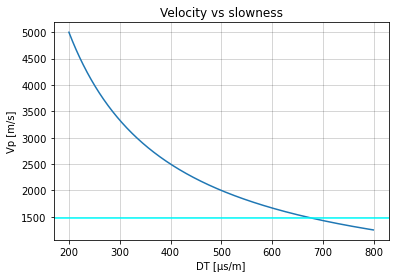

In [11]:
dt = np.arange(200, 800)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(dt, vel_from_slow(dt))

# Optional annotation.
ax.set_title('Velocity vs slowness')
ax.set_xlabel('DT [µs/m]')
ax.set_ylabel('Vp [m/s]')
ax.grid(c='k', alpha=0.2)
ax.axhline(1486, c='cyan')  # Water velocity.

## Optional arguments and default values

Remember `math.log()`? You can optionally pass the base of the logarithm; by default it is Euler's constant, e.

We can do that in our functions too.

Suppose we want to implement [Gardner's equation](https://www.subsurfwiki.org/wiki/Gardner%27s_equation):

$$ \rho = 310\ V_\mathrm{P}^{\,0.25}\ \ \mathrm{kg}/\mathrm{m}^3 $$

Let's go through this together:

### Instructor notes:

Build up gradually:
    
- Implement Gardner's equation as a Python function.
- Make the factor $\alpha$ of 310 and the exponent $\beta$ of 0.25 into arguments the user can change if they want to. I.e. give them default values.
- How can you make this function accept a list of velocities?
- Add this function to your `utils.py` file in the `/notebooks` folder.

In [ ]:
def gardner():
    raise NotImplementedError

In [12]:
def gardner(vp, alpha=310, beta=0.25):
    """Compute RHOB from Vp using Gardner's relation.
    
    Example
    >>> gardner(2500)
    2192.0310216782973
    """
    rho = alpha * vp**beta
    
    return rho

The following cell should return **no outputs** if you function is written correctly:

In [13]:
np.testing.assert_almost_equal(gardner(2650), 2224.1965, decimal=4)

## Multiple returns

Functions can only return one thing, but we can pack multiple things into a collection of some kind, frequently a tuple.

We are going to write a function that takes a dataset and returns the maximum value, along with the index position(s) of that maximum.

In [17]:
def max_and_pos(data):
    """Returns the maximum value and the position of that value, if it is present.

    Args:
        data (array-like), input values
    Returns:
        max, x_pos, y_pos
    """
    median_val = np.mean(data)
    positions = np.argwhere(data == median_val)
    
    return median_val, positions

In [18]:
max_and_pos(dt)

(499.5, array([], shape=(0, 1), dtype=int64))

The next two topics (`args` and `kwargs`, and `try`/`except` blocks) are included here as something for you to look at in your own time, so that they are at least somewhat familiar when you come across them in the future.

## `args` and `kwargs`

This is a more advanced concept, but it's good to know about. We can write functions that take an arbitrary number of arguments, as well as arguments you give specific names to:

In [ ]:
def add(*args):
    print(args)
    return sum(args)

add(2, 3, 4, 5, 6, 7)

We can mix this with an arbitrary number of positional and keyword arguments:

In [ ]:
def foo(x, y, *args):
    """
    Print these things.
    """
    print(x, y)
    print(args)
    return

In [ ]:
foo(2, 'this', 'that', 45)

The unnamed `args` are stored in a `tuple`, and this is what was printed out by `print(args)`.

You can pass keyword arguments in the same way, with a slightly different syntax:

In [ ]:
def bar(x, y=1, **kwargs):
    print(x, y)
    print(kwargs)
    return

This time the unspecified `kwargs` are stored in a `dict`:

In [ ]:
bar(2, 'this', that='that', other=45)

You can create a `dict` of containing the keywords and values outside the function and pass it in. The `**kwargs` syntax unpacks the element of the dictionary for use inside the function:

In [ ]:
func_params = dict(param1='alpha', param2='beta', param3=99.0)

func_params

In [ ]:
bar(2, **func_params)

In [ ]:
lineplot_params = {'xlabel': 'time (s)',
                   'linewidth': 2,
                   'color': '#DD1D21'}

In [ ]:
def my_awesome_plot(x, y, **kwargs):
    """A plot to showcase **kwargs."""
    label_text = kwargs.pop('xlabel') # we have to pop this off before passing into plot()
    plt.title('Two sine waves')
    plt.xlabel(label_text)
    plt.ylabel('Signal')
    plt.plot(x, y, **kwargs)
    plt.scatter(x, y)
    return None

In [ ]:
x = np.arange(0, 10, 0.3)
y = np.sin(10 * x) + np.sin(8 * x)
my_awesome_plot(x, y, **lineplot_params)

## `try` and `except`

This is not really related to functions directly, but is how to handle errors that are caused by code that is valid int terms of syntax, but can not be executed for some reason. Effectively, we are going to ask for forgiveness rather permission to do something that might not actually work.

Here is a simple example, attempting to typecast a `str` into a `int`:

In [ ]:
int('42.4') # this will fail

In [ ]:
y = '42.5'
try:
    x = int(y)
except ValueError:
    x = float(y)
x

In [ ]:
y = '42'
try:
    x = int(y)
except ValueError:
    x = float(y)
x

Things to bear in mind here:

* Avoid a bare `except`: you should always have a way to fix the exception that has been raised.
* The built-in set of Exceptions that are available are discussed in the [Python documentation](https://docs.python.org/3/library/exceptions.html). Some libraries may also have their own.
* There are more details here that are worth reading: https://docs.python.org/3/tutorial/errors.html

## Closing notes

Functions are extremely useful, and in many cases if you write code it should be put into a function to aid later re-use, and prevent needing to right the same code many times.

When writing functions, _always_ add a docstring. There are a few standards that are common, so choose something for your project and stick to it. [Here is a comparison of the following styles](https://queirozf.com/entries/python-docstrings-reference-examples):
* Google: https://github.com/google/styleguide/blob/gh-pages/pyguide.md#38-comments-and-docstrings
* Numpy: https://numpydoc.readthedocs.io/en/latest/format.html
* Matplotlib: https://matplotlib.org/stable/devel/documenting_mpl.html#writing-docstrings (this uses ReStructured Text, which is very common in other libraries)

Try and keep functions self-contained, and return something sensible from them.

## Next

We are going to combine everything that we have seen so far to make our combination plot.